Importing Libaries:

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

Loading the DataSet:

In [22]:
df=pd.read_csv("C:\\Users\\admin\\Downloads\\Country-data.csv")

In [23]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


Separating The Data and Country Name for Clustering:

In [24]:
X = df.drop('country', axis=1)
country_names = df['country']


Scaling the data and finding optimal k-value using Elbow Curve:

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Calculate inertia for a range of K values
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

Plotting the Elbow Curve:

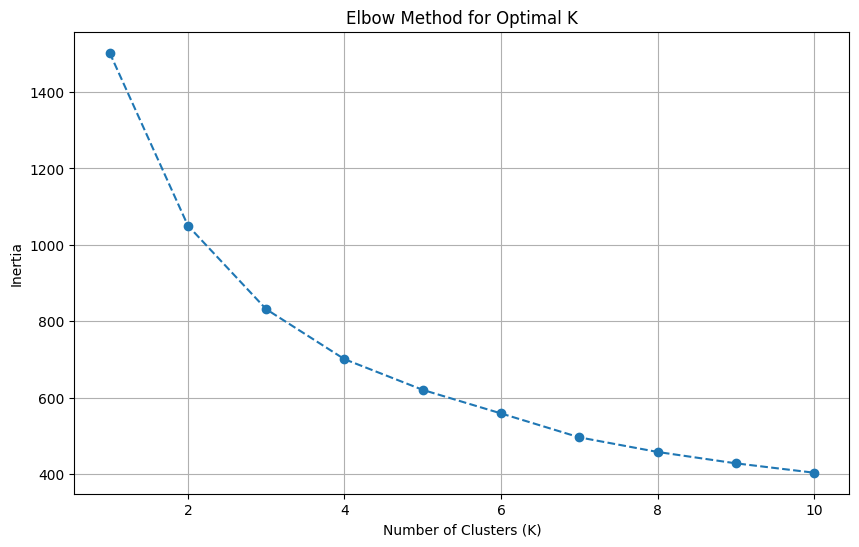

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()


 K-means Clustering and Analysis 

In [27]:
# Set the optimal number of clusters
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Add the cluster labels back to the original dataframe
df['cluster'] = kmeans.labels_
df['cluster']=df['cluster'].astype(int)
df['cluster']

0      1
1      2
2      2
3      1
4      2
      ..
162    2
163    2
164    2
165    1
166    1
Name: cluster, Length: 167, dtype: int64

 Analyze the characteristics of each cluster by calculating the mean

In [28]:
cluster_analysis = df.groupby('cluster')['cluster'].mean()
print("Cluster Analysis (Mean values):")
print(cluster_analysis)


Cluster Analysis (Mean values):
cluster
0    0.0
1    1.0
2    2.0
Name: cluster, dtype: float64


Visualization and Recommendation

In [29]:
# Reduce dimensionality using PCA for 2D plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a new DataFrame for plotting
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['cluster'] = df['cluster']
df_pca['country'] = country_names


Plotting The Clusters

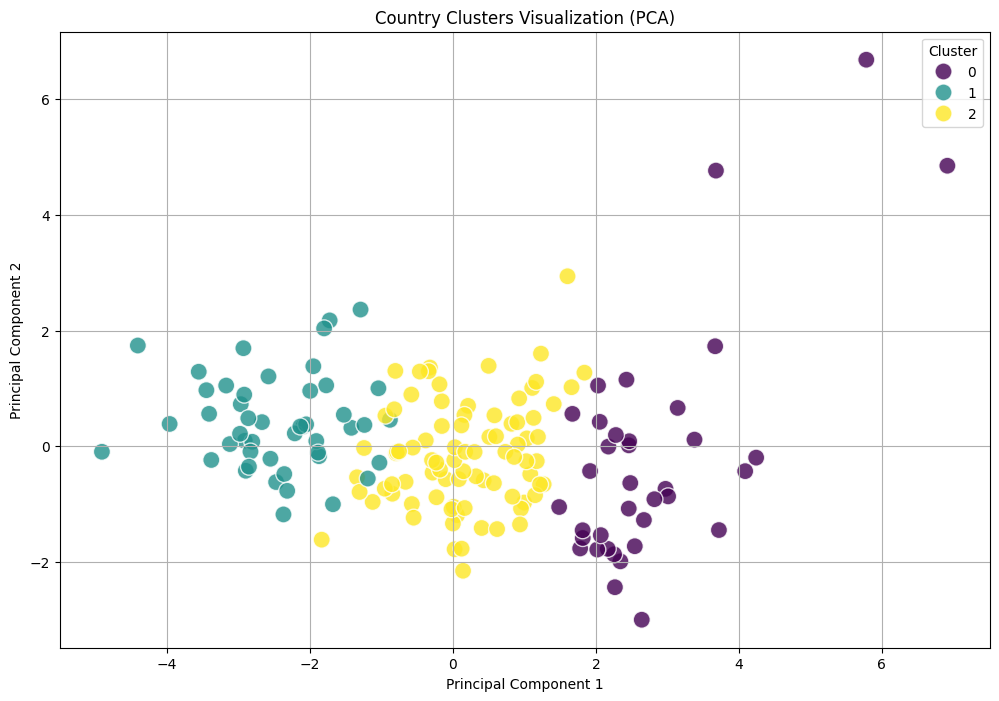

In [30]:
plt.figure(figsize=(12, 8))
sb.scatterplot(x='PC1', y='PC2', hue='cluster', data=df_pca, palette='viridis', s=150, alpha=0.8)
plt.title('Country Clusters Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


Final Analysis and Recommendation:

In [31]:
cluster_analysis = df.groupby('cluster').mean(numeric_only=True)
print("\n--- Cluster Analysis (Mean Values) ---")
print(cluster_analysis[['child_mort', 'income', 'gdpp', 'life_expec']])

in_need_cluster_id = cluster_analysis.sort_values(by='gdpp', ascending=True).index[0]
in_need_countries = df[df['cluster'] == in_need_cluster_id]['country'].tolist()

print(f"\nCluster {in_need_cluster_id} represents countries most in need of aid.")
print("\n--- Recommended Countries for Aid Program ---")
print(in_need_countries)


--- Cluster Analysis (Mean Values) ---
         child_mort        income          gdpp  life_expec
cluster                                                    
0          5.000000  45672.222222  42494.444444   80.127778
1         92.961702   3942.404255   1922.382979   59.187234
2         21.927381  12305.595238   6486.452381   72.814286

Cluster 1 represents countries most in need of aid.

--- Recommended Countries for Aid Program ---
['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Z